# Minimalistic plotting example

In [1]:
import discretisedfield as df
import matplotlib.pyplot as plt
%matplotlib inline

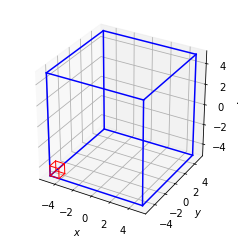

In [2]:
# NBVAL_IGNORE_OUTPUT
mesh = df.Mesh(p1=(-5, -5, -5), p2=(5, 5, 5), cell=(1, 1, 1))
mesh

In [3]:
# NBVAL_IGNORE_OUTPUT
def val(pos):
    x, y, z = pos
    return y, x, x*y

def norm_fun(pos):
    x, y, z = pos
    if x**2 + y**2 + z**2 < 5**2:
        return 1
    else:
        return 0

field = df.Field(mesh, value=val, norm=norm_fun)

## Plotting scalar component (x, y, z)

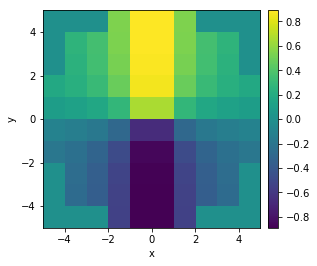

In [4]:
# NBVAL_IGNORE_OUTPUT
field.x.plot_plane("z")

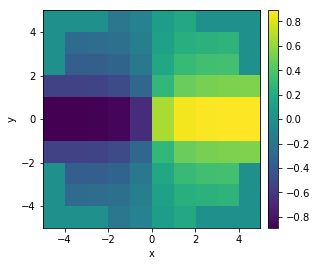

In [5]:
# NBVAL_IGNORE_OUTPUT
field.y.plot_plane("z")

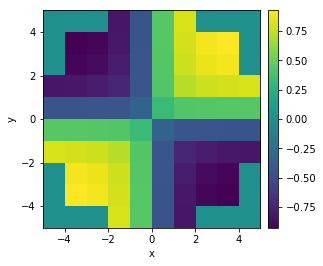

In [6]:
# NBVAL_IGNORE_OUTPUT
field.z.plot_plane("z")

## Plotting vector

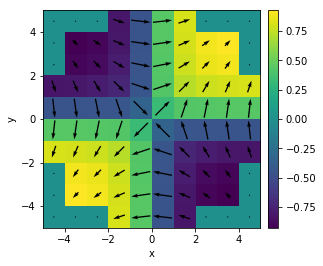

In [7]:
# NBVAL_IGNORE_OUTPUT
field.plot_plane("z")

## Divided plotting

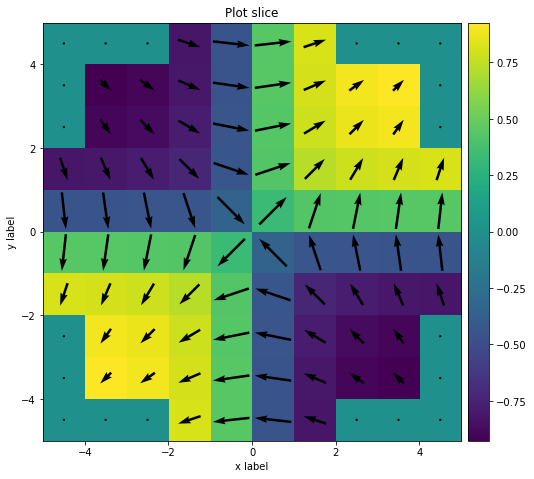

In [8]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

imax = field.z.imshow("z", ax=ax, interpolation="nearest", cmap="viridis")
qvax = field.quiver("z", ax=ax, n=(10, 10))
field.colorbar(ax, imax)

ax.set_title("Plot slice")
ax.set_xlabel("x label")

ax.set_ylabel("y label")

## Wishlist

- plot a scalar field
- plot a vector field
  - colour the vectors depending on the magnitude/component
- slices
- cones instead of arrows
- zero vectors
- time-dependent data

In [14]:
field.array.shape

(10, 10, 10, 3)

In [144]:
import k3d
import numpy as np 

In [145]:
plot = k3d.plot()
plot

Plot(antialias=True, background_color=16777215, grid=[-1, -1, -1, 1, 1, 1], height=512)

In [146]:
v = field.array

In [147]:
origins = np.array(list(field.mesh.coordinates))

In [204]:
nz,ny,nx,_ = v.shape

In [149]:
v_flat = v.reshape(-1,3)
v_flat_nonzero = v_flat[np.sum(v_flat**2,axis=-1)!=0]

In [150]:
origins_nonzero = origins[np.sum(v_flat**2,axis=-1)!=0]

In [151]:
plt_vec2 = k3d.vectors(origins_nonzero,v_flat_nonzero)
plot += plt_vec2

In [152]:
plt_centers = k3d.points(origins)

In [153]:
plot += plt_centers

In [154]:
plt_centers.point_size = 0.1
plt_centers.color = 0x00ff00

In [155]:
#dxyz = np.array(field.mesh.cell)
#plt_vec2.origins  = origins_nonzero - dxyz/2

In [164]:
xmin,ymin,zmin = field.mesh.pmin
xmax,ymax,zmax = field.mesh.pmax

In [180]:
plt_vox = k3d.voxels(v[...,0]!=0,color_map=[0xff0000],\
                           xmin=xmin,xmax=xmax,\
                               ymin=ymin,ymax=ymax,\
                               zmin=zmin,zmax=zmax) 

In [181]:
plot += plt_vox

In [174]:
plt_iso = k3d.marching_cubes(np.sum(v**2,axis=-1),level=0.3,\
                           xmin=xmin,xmax=xmax,\
                               ymin=ymin,ymax=ymax,\
                               zmin=zmin,zmax=zmax) 

In [175]:
plot+= plt_iso

In [177]:
plt_iso.level= 0.6

In [178]:
plt_vox.voxels = ~(plt_vox.voxels.copy())

In [184]:
list(field.plane(x=0))

[((0, -4.5, -4.5), (-0.0, -0.0, 0.0)),
 ((0, -4.5, -3.5), (-0.0, -0.0, 0.0)),
 ((0, -4.5, -2.5), (-0.0, -0.0, 0.0)),
 ((0, -4.5, -1.5),
  (-0.8900427175814678, -0.098893635286829748, 0.4450213587907339)),
 ((0, -4.5, -0.5),
  (-0.8900427175814678, -0.098893635286829748, 0.4450213587907339)),
 ((0, -4.5, 0.5),
  (-0.8900427175814678, -0.098893635286829748, 0.4450213587907339)),
 ((0, -4.5, 1.5),
  (-0.8900427175814678, -0.098893635286829748, 0.4450213587907339)),
 ((0, -4.5, 2.5), (-0.0, -0.0, 0.0)),
 ((0, -4.5, 3.5), (-0.0, -0.0, 0.0)),
 ((0, -4.5, 4.5), (-0.0, -0.0, 0.0)),
 ((0, -3.5, -4.5), (-0.0, -0.0, 0.0)),
 ((0, -3.5, -3.5),
  (-0.88721395073426912, -0.12674485010489558, 0.44360697536713456)),
 ((0, -3.5, -2.5),
  (-0.88721395073426912, -0.12674485010489558, 0.44360697536713456)),
 ((0, -3.5, -1.5),
  (-0.88721395073426912, -0.12674485010489558, 0.44360697536713456)),
 ((0, -3.5, -0.5),
  (-0.88721395073426912, -0.12674485010489558, 0.44360697536713456)),
 ((0, -3.5, 0.5),
  (-0.

In [188]:
ith = 4 
v_slice = v[:,:,ith,1]

In [217]:
ni,nj = v_slice.shape
indices = []
for i in range(ni-1):
    for j in range(nj-1):
        indices.append((i*nj+j,i*nj+j+1,(i+1)*nj+j))
        indices.append(((i+1)*nj+j+1,i*nj+j+1,(i+1)*nj+j))

In [219]:
origins.reshape(nz,ny,nx,3)[:,:,ith,:].reshape(-1,3).shape,len(indices)


((100, 3), 162)

In [220]:
origins_slice = origins.reshape(nz,ny,nx,3)[:,:,ith,:]

In [227]:
#plt_mesh = k3d.mesh(origins_slice,indices)
 
plt_mesh = k3d.mesh(origins_slice, indices, attribute=v_slice,\
                    color_map=k3d.basic_color_maps.CoolWarm,\
                    color_range=[-1.0, 1.0])


In [228]:
plot += plt_mesh

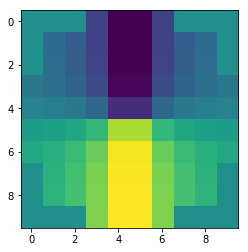

In [226]:
import matplotlib.pyplot as plt
plt.imshow(v_slice)

In [239]:
from ipywidgets import widgets,interact
@interact(ith=widgets.IntSlider(nx//2,0,nx-1))
def _(ith):
    print(ith)
    plt_mesh.vertices =  origins.reshape(nz,ny,nx,3)[:,:,ith,:]
    plt_mesh.attribute = v[:,:,ith,2]

interactive(children=(IntSlider(value=5, description='ith', max=9), Output()), _dom_classes=('widget-interact'…

In [230]:
ith = 7
